<a href="https://colab.research.google.com/github/ajanthasingam/Machine-Learning-Coursework/blob/master/MachineLearningCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras


Using TensorFlow backend.


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Machine Learning Coursework/train.csv')
#final = pd.read_csv('/content/drive/My Drive/Machine Learning Coursework/test.csv')


In [ ]:
nan_value = float("NaN")

#Convert NaN values to empty string

train.replace("", nan_value, inplace=True)
train.replace("nan", nan_value, inplace=True)


train.dropna(inplace=True)

In [ ]:
print(train.isnull().sum())
print(train.isnull().values.any())

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
dtype: int64
False


In [ ]:
label = train["label"]
import math
distance_squared = ((train['drop_lat']-train['pick_lat'])**2) + ((train['drop_lon']-train['pick_lon'])**2)
train["distance"]= np.sqrt(distance_squared)
train['fare']=train['fare']-train['additional_fare'] -train['meter_waiting_fare']
train['duration']=train['duration']-train['meter_waiting']


In [ ]:
train["distance"].head

<bound method NDFrame.head of 0        0.045869
1        0.028500
2        0.057019
3        0.007806
5        0.217734
           ...   
17171    0.019087
17172    0.098307
17173    0.009405
17174    0.026057
17175    0.019155
Name: distance, Length: 16968, dtype: float64>

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns

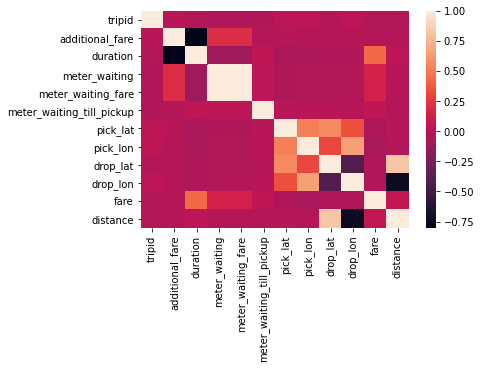

In [ ]:
data = train.iloc[:,:]
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
corr = data.corr()
sns.heatmap(corr)

In [ ]:
print(train.isnull().sum())
print(train.isnull().values.any())

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
distance                     0
dtype: int64
False


In [ ]:
train.head

<bound method NDFrame.head of         tripid  additional_fare  duration  ...       fare    label  distance
0          0.0             10.5     778.0  ...   259.8200  correct  0.045869
1          1.0             10.5     744.0  ...   187.3500  correct  0.028500
2          2.0             10.5    1007.0  ...   291.1400  correct  0.057019
3          3.0             10.5     327.0  ...    56.1362  correct  0.007806
5          4.0             10.5    3225.0  ...  1054.5200  correct  0.217734
...        ...              ...       ...  ...        ...      ...       ...
17171  16960.0             10.5     745.0  ...   182.3381  correct  0.019087
17172  16961.0             10.5    1723.0  ...   570.7300  correct  0.098307
17173  16962.0             10.5     254.0  ...    65.7000  correct  0.009405
17174  16963.0             10.5     743.0  ...   122.8100  correct  0.026057
17175  16964.0             10.5     241.0  ...    86.8457  correct  0.019155

[16968 rows x 15 columns]>

In [ ]:
todrop=["drop_lat",
        "drop_lon",
        "pick_lat",
        "pick_lon",
        "tripid",
        "pickup_time",
        "drop_time",
        "label",
        "additional_fare",
        'meter_waiting_fare']
train.drop(todrop , axis=1, inplace=True)

In [ ]:
train.head

<bound method NDFrame.head of        duration  meter_waiting  meter_waiting_till_pickup       fare  distance
0         778.0           56.0                       64.0   259.8200  0.045869
1         744.0           47.0                      134.0   187.3500  0.028500
2        1007.0           80.0                       61.0   291.1400  0.057019
3         327.0          271.0                       68.0    56.1362  0.007806
5        3225.0          182.0                      112.0  1054.5200  0.217734
...         ...            ...                        ...        ...       ...
17171     745.0           93.0                      451.0   182.3381  0.019087
17172    1723.0          428.0                       39.0   570.7300  0.098307
17173     254.0            9.0                      110.0    65.7000  0.009405
17174     743.0          115.0                      317.0   122.8100  0.026057
17175     241.0           21.0                       23.0    86.8457  0.019155

[16968 rows x 5 colum

In [ ]:
label.head

<bound method NDFrame.head of 0        correct
1        correct
2        correct
3        correct
5        correct
          ...   
17171    correct
17172    correct
17173    correct
17174    correct
17175    correct
Name: label, Length: 16968, dtype: object>

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(train, label, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0 , penalty='l1')


model.fit(xTrain, yTrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.classes_


array(['correct', 'incorrect'], dtype=object)

In [ ]:
model.score(xTest, yTest)

0.9239835002946376

In [ ]:
confusion_matrix(yTest, model.predict(xTest))

array([[3089,   11],
       [ 247,   47]])

In [ ]:
prediction=model.predict(xTest)
print(prediction)

from sklearn.metrics import f1_score

f1_score(yTest, prediction,pos_label="correct")

['correct' 'correct' 'correct' ... 'correct' 'correct' 'correct']


0.9599129894344313

In [ ]:
print(classification_report(yTest, model.predict(xTest)))

              precision    recall  f1-score   support

     correct       0.93      1.00      0.96      3100
   incorrect       0.81      0.16      0.27       294

    accuracy                           0.92      3394
   macro avg       0.87      0.58      0.61      3394
weighted avg       0.92      0.92      0.90      3394



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000000000, tol=1e-3, loss='log',penalty='l1', learning_rate = 'constant',eta0=0.19))

In [ ]:
clf.fit(xTrain, yTrain)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.19,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='constant', loss='log',
                               max_iter=1000000000, n_iter_no_change=5,
                               n_jobs=None, penalty='l1', power_t=0.5,
                               random_state=None, shuffle=True, tol=0.001,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False))],
         verbose=False)

In [ ]:
clf.score(xTest, yTest)

0.921921037124337

In [ ]:
prediction=clf.predict(xTest)
print(prediction)


f1_score(yTest, prediction,pos_label="correct")

['correct' 'correct' 'correct' ... 'correct' 'correct' 'correct']


0.9589083578849433

In [ ]:
from sklearn import svm

svc = svm.SVC()
svc.fit(xTrain, yTrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.score(xTest,yTest)

0.9183853859752504

In [ ]:
svc.score(xTrain,yTrain)

0.9137321349639016

In [ ]:
prediction=svc.predict(xTest)
print(prediction)


f1_score(yTest, prediction,pos_label="correct")

['correct' 'correct' 'correct' ... 'correct' 'correct' 'correct']


0.957193633132437

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(xTrain, yTrain)


In [ ]:
model.score(xTest,yTest)

0.9018856806128462

In [ ]:
prediction=model.predict(xTest)
print(prediction)


f1_score(yTest, prediction,pos_label="correct")

['correct' 'correct' 'correct' ... 'correct' 'correct' 'correct']


0.947731910218176

In [ ]:
from sklearn.naive_bayes import ComplementNB
CNBclf = ComplementNB()
CNBclf.fit(xTrain, yTrain)

ValueError: ignored

In [ ]:
CNBclf.score(xTest,yTest)

In [ ]:
prediction=CNBclf.predict(xTest)
print(prediction)


f1_score(yTest, prediction,pos_label="correct")

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 

In [ ]:
clf_entropy.fit(xTrain, yTrain) 

In [ ]:
clf_entropy.score(xTest,yTest)

In [ ]:
prediction=clf_entropy.predict(xTest)
print(prediction)


f1_score(yTest, prediction,pos_label="correct")

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
clf_gini.fit(xTrain, yTrain) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
clf_gini.score(xTest,yTest)

0.9387153800824986

In [ ]:
prediction=clf_gini.predict(xTest)
print(prediction)


f1_score(yTest, prediction,pos_label="correct")

['correct' 'correct' 'correct' ... 'correct' 'correct' 'correct']


0.9673674301851272

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction=clf.predict(xTest)
print(prediction)

from sklearn.metrics import f1_score

f1_score(yTest, prediction,pos_label="correct")

['correct' 'correct' 'incorrect' ... 'correct' 'correct' 'correct']


0.9750119369727837

In [ ]:
yTest.head

<bound method NDFrame.head of 12261    incorrect
14829      correct
13       incorrect
13175      correct
3764       correct
           ...    
7833       correct
16038      correct
2083       correct
8307       correct
15012      correct
Name: label, Length: 3394, dtype: object>

In [ ]:
from sklearn.metrics import f1_score

f1_score(yTest, prediction,pos_label="correct", labels=["correct"],average='micro')
    #print "f1 score macro",metrics.f1_score(true_label, predicted, average='macro')     
    #print "f1 score micro",metrics.f1_score(true_label, predicted, average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'correct') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.9750119369727837

In [ ]:
final = pd.read_csv('/content/drive/My Drive/Machine Learning Coursework/test.csv')

In [ ]:
final.shape

(8576, 13)

In [ ]:
final.head

<bound method NDFrame.head of          tripid  additional_fare  duration  ...  drop_lat  drop_lon     fare
0     213284604             10.5       924  ...   6.77490   79.8840   289.27
1     213286352             10.5      4249  ...   6.55091   79.9706  1912.70
2     213293973             10.5      1552  ...   6.90539   79.8989   394.00
3     213294622             10.5       462  ...   6.80401   79.9407   154.32
4     213298687             10.5       814  ...   6.98875   79.8914   147.47
...         ...              ...       ...  ...       ...       ...      ...
8571  222856243             10.5      1723  ...   6.85588   79.9214   388.48
8572  222857785             10.5      1378  ...   6.92112   79.8980   379.85
8573  222858416             10.5       418  ...   6.83868   79.9083   112.79
8574  222858691             10.5      1604  ...   6.93159   79.9145   248.46
8575  222860703             10.5      1698  ...   6.87020   79.9340   339.63

[8576 rows x 13 columns]>

In [ ]:
distance_squared = ((final['drop_lat']-final['pick_lat'])**2) + ((final['drop_lon']-final['pick_lon'])**2)
final["distance"]= np.sqrt(distance_squared)
final['fare']=final['fare']-final['additional_fare'] -final['meter_waiting_fare']
final['duration']=final['duration']-final['meter_waiting']


In [ ]:
prediction=final['tripid']

todrop=["drop_lat",
        "drop_lon",
        "pick_lat",
        "pick_lon",
        "tripid",
        "pickup_time",
        "drop_time",
        "additional_fare",
        'meter_waiting_fare']
final.drop(todrop , axis=1, inplace=True)

In [ ]:
final.shape


(8576, 5)

In [ ]:
y_pred=clf.predict(final)

In [ ]:
yy=pd.DataFrame(y_pred)
yy.head


<bound method NDFrame.head of               0
0       correct
1     incorrect
2       correct
3       correct
4       correct
...         ...
8571    correct
8572    correct
8573    correct
8574    correct
8575    correct

[8576 rows x 1 columns]>

In [ ]:
yy.keys

<bound method NDFrame.keys of               0
0       correct
1     incorrect
2       correct
3       correct
4       correct
...         ...
8571    correct
8572    correct
8573    correct
8574    correct
8575    correct

[8576 rows x 1 columns]>

In [ ]:
yy.to_csv('pred1.csv')

In [ ]:
prediction.head

<bound method NDFrame.head of 0       213284604
1       213286352
2       213293973
3       213294622
4       213298687
          ...    
8571    222856243
8572    222857785
8573    222858416
8574    222858691
8575    222860703
Name: tripid, Length: 8576, dtype: int64>

In [ ]:
yy['tripd']=prediction["tripid"]

KeyError: ignored